<a href="https://colab.research.google.com/github/JeremyPanJD/stuff/blob/master/PISA_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A PCA of the above variables found a 3 component reduction. To consider for future use. 

# Overview

## Algorithms used
* Baseline regression
* SGD Regressor
* ADABoost Regressor
* SV Regressor
* Deep Nets

## Steps
* One-hot encode categorical vars
* Standardize Mean.Math and predictors




# Selection of variables for prediction

## Pre-analysis using SPSS

Pre-analysis using hierarchical linear regression

* covariates entered in the first step
* Self-reported measures used in the second step

found that Family Wealth, Perception of competitiveness in school, and sense of belonging to school were *not significant* in predicting PISA Math ability. 

This was also noted during initial regression in python with the above-mentioned variables having low or zero coefficients (0 to ~0.01)

Thus, will remove from future steps in ML. 

## PCA of variables

# Loading in packages

In [ ]:
pip install lassonet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#main
import tensorflow as tf
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import lassonet

# Tensorflow and Keras
from tensorflow.keras import layers as Layers
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model

#Processing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Algorithms
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

#Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Optimizers
from tensorflow.keras.optimizers import Adam



In [ ]:
help(lassonet)

Help on package lassonet:

NAME
    lassonet

PACKAGE CONTENTS
    interfaces
    model
    prox
    prox-examples
    r
    utils

FILE
    /usr/local/lib/python3.7/dist-packages/lassonet/__init__.py




## Feature Selection

In [ ]:
from lassonet import LassoNetRegressor
from sklearn.datasets import load_diabetes

In [ ]:
X, y = load_diabetes(return_X_y = True)
model = LassoNetRegressor()
model.fit(X,y)

LassoNetRegressor(device=device(type='cuda'))

In [ ]:
type(X)

numpy.ndarray

In [ ]:
X.shape,y.shape

((442, 10), (442,))

# Load in Data

In [ ]:
# Load in data from github
!wget https://raw.githubusercontent.com/JeremyPanJD/stuff/master/PISA_test.csv

--2022-07-12 06:58:28--  https://raw.githubusercontent.com/JeremyPanJD/stuff/master/PISA_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1754013 (1.7M) [text/plain]
Saving to: ‘PISA_test.csv’

PISA_test.csv       100%[===================>]   1.67M  --.-KB/s    in 0.03s   

2022-07-12 06:58:29 (55.1 MB/s) - ‘PISA_test.csv’ saved [1754013/1754013]



In [ ]:
PISA = pd.read_csv("/content/PISA_test.csv")
PISA

,ST004D01T,MISCED,FISCED,REPEAT,WEALTH,TEACHSUP,DIRINS,PERFEED,EMOSUPS,PERCOMP,...,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV6MATH,PV7MATH,PV8MATH,PV9MATH,PV10MATH,Mean.Math
0,2,6,6,1,3.1045,-1.1481,-1.0499,-0.3253,1.0346,2.0378,...,484.940,504.516,489.777,499.352,506.709,492.698,451.544,463.330,468.642,484.92
1,2,4,2,0,0.4783,1.3140,1.8202,2.0165,1.0346,2.0378,...,463.350,452.612,454.741,550.980,423.527,421.069,437.296,372.823,370.471,438.15
2,1,4,6,0,1.5937,1.3140,1.8202,1.5844,1.0346,0.6912,...,329.377,326.831,450.079,376.246,360.480,432.748,328.568,399.607,410.414,386.56
3,1,6,6,0,0.1184,0.7015,0.2860,0.8654,1.0346,-1.9892,...,580.903,443.859,510.238,525.548,547.980,448.527,550.740,519.252,424.691,500.80
4,1,6,5,0,1.9399,0.7015,-0.0424,0.7743,1.0346,2.0378,...,497.018,461.940,477.415,531.707,500.029,517.522,495.786,556.845,509.789,508.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,1,5,4,0,-0.4479,-1.6385,-1.3309,-0.0008,-2.0819,-1.5580,...,425.666,506.967,499.838,500.899,466.503,519.023,517.972,530.628,457.134,488.47
9455,1,6,6,0,1.1025,-1.1846,1.1049,-0.3253,-1.6735,-0.6142,...,341.436,458.803,394.903,402.680,419.458,473.483,375.546,459.061,472.896,420.46
9456,1,6,6,0,2.6742,-0.9306,0.0351,-0.3253,1.0346,2.0378,...,358.358,323.541,317.103,220.606,401.668,348.219,333.548,283.241,360.705,327.03
9457,1,6,6,0,0.2030,1.3140,1.8202,-1.6391,-1.1869,0.6912,...,325.016,334.711,308.303,314.648,297.148,345.016,307.365,327.787,205.345,316.51


In [ ]:
PISA_keys = ["Gender", "Mother Education","Father Education","Grade Repeat", "Family Wealth", "Teacher support", "Teacher-directed instruction", "Perceived Feedback", "Parent's emotional support", "Perception of Competitiveness in schools",
             "Perception of Cooperation at school", "General fear of failure", "eudaemonia Meaning in life", "Resilience", "Cognitive Flexibility", "Subjective Wellbeing Sense of Belonging in School", "Average Math"]


In [ ]:
PISA.columns

Index(['ST004D01T', 'MISCED', 'FISCED', 'REPEAT', 'WEALTH', 'TEACHSUP',
       'DIRINS', 'PERFEED', 'EMOSUPS', 'PERCOMP', 'PERCOOP', 'GFOFAIL',
       'EUDMO', 'RESILIENCE', 'COGFLEX', 'BELONG', 'PV1MATH', 'PV2MATH',
       'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV6MATH', 'PV7MATH', 'PV8MATH',
       'PV9MATH', 'PV10MATH', 'Mean.Math'],
      dtype='object')

In [ ]:
PISA1 = PISA.drop(columns = ['PV1MATH', 'PV2MATH',
       'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV6MATH', 'PV7MATH', 'PV8MATH',
       'PV9MATH', 'PV10MATH'])
PISA1

,ST004D01T,MISCED,FISCED,REPEAT,WEALTH,TEACHSUP,DIRINS,PERFEED,EMOSUPS,PERCOMP,PERCOOP,GFOFAIL,EUDMO,RESILIENCE,COGFLEX,BELONG,Mean.Math
0,2,6,6,1,3.1045,-1.1481,-1.0499,-0.3253,1.0346,2.0378,1.6762,1.8905,1.7411,2.3693,2.1449,2.7562,484.92
1,2,4,2,0,0.4783,1.3140,1.8202,2.0165,1.0346,2.0378,1.6762,-1.8939,-0.9827,2.3693,2.1449,2.7474,438.15
2,1,4,6,0,1.5937,1.3140,1.8202,1.5844,1.0346,0.6912,1.6762,1.4083,1.7411,2.3693,2.1449,2.7249,386.56
3,1,6,6,0,0.1184,0.7015,0.2860,0.8654,1.0346,-1.9892,1.6762,1.4083,1.7411,2.3693,2.1449,2.7249,500.80
4,1,6,5,0,1.9399,0.7015,-0.0424,0.7743,1.0346,2.0378,1.6762,0.5949,1.7411,2.3693,2.1449,2.7249,508.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,1,5,4,0,-0.4479,-1.6385,-1.3309,-0.0008,-2.0819,-1.5580,-2.1428,1.8905,-2.1464,-2.1837,-1.2313,-3.2367,488.47
9455,1,6,6,0,1.1025,-1.1846,1.1049,-0.3253,-1.6735,-0.6142,-2.1428,1.0944,-2.1464,-1.3493,-1.2798,-3.2367,420.46
9456,1,6,6,0,2.6742,-0.9306,0.0351,-0.3253,1.0346,2.0378,-2.1428,0.4637,-2.1464,-1.5508,-1.3485,-3.2367,327.03
9457,1,6,6,0,0.2030,1.3140,1.8202,-1.6391,-1.1869,0.6912,-2.1428,1.8905,-2.1464,-2.5219,-3.2784,-3.2367,316.51


In [ ]:
# Rename columns
PISA2 = PISA1.rename(columns = {"ST004D01T":"GENDER", "MISCED":"MOTHEREDU", "FISCED":"FATHEREDU", "DIRINS":"TeacherInstruction","GFOFAIL":"FAILURE", "EUDMO":"MEANINGLIFE", "Mean.Math":"AvgMath"})

In [ ]:
PISA2

,GENDER,MOTHEREDU,FATHEREDU,REPEAT,WEALTH,TEACHSUP,TeacherInstruction,PERFEED,EMOSUPS,PERCOMP,PERCOOP,FAILURE,MEANINGLIFE,RESILIENCE,COGFLEX,BELONG,AvgMath
0,2,6,6,1,3.1045,-1.1481,-1.0499,-0.3253,1.0346,2.0378,1.6762,1.8905,1.7411,2.3693,2.1449,2.7562,484.92
1,2,4,2,0,0.4783,1.3140,1.8202,2.0165,1.0346,2.0378,1.6762,-1.8939,-0.9827,2.3693,2.1449,2.7474,438.15
2,1,4,6,0,1.5937,1.3140,1.8202,1.5844,1.0346,0.6912,1.6762,1.4083,1.7411,2.3693,2.1449,2.7249,386.56
3,1,6,6,0,0.1184,0.7015,0.2860,0.8654,1.0346,-1.9892,1.6762,1.4083,1.7411,2.3693,2.1449,2.7249,500.80
4,1,6,5,0,1.9399,0.7015,-0.0424,0.7743,1.0346,2.0378,1.6762,0.5949,1.7411,2.3693,2.1449,2.7249,508.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,1,5,4,0,-0.4479,-1.6385,-1.3309,-0.0008,-2.0819,-1.5580,-2.1428,1.8905,-2.1464,-2.1837,-1.2313,-3.2367,488.47
9455,1,6,6,0,1.1025,-1.1846,1.1049,-0.3253,-1.6735,-0.6142,-2.1428,1.0944,-2.1464,-1.3493,-1.2798,-3.2367,420.46
9456,1,6,6,0,2.6742,-0.9306,0.0351,-0.3253,1.0346,2.0378,-2.1428,0.4637,-2.1464,-1.5508,-1.3485,-3.2367,327.03
9457,1,6,6,0,0.2030,1.3140,1.8202,-1.6391,-1.1869,0.6912,-2.1428,1.8905,-2.1464,-2.5219,-3.2784,-3.2367,316.51


In [ ]:
PISA2.REPEAT.describe()

count    9459.000000
mean        0.055397
std         0.228766
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: REPEAT, dtype: float64

note. this shows that Repeat is only 1 or 0

# One-hot encoding for education

In [ ]:
Mother = PISA2.MOTHEREDU
Mother

0       6
1       4
2       4
3       6
4       6
       ..
9454    5
9455    6
9456    6
9457    6
9458    4
Name: MOTHEREDU, Length: 9459, dtype: int64

In [ ]:
Mother.shape

(9459,)

In [ ]:
Mother1 = np.asarray(Mother)

In [ ]:
Mother1

array([6, 4, 4, ..., 6, 6, 4])

In [ ]:
enc = OneHotEncoder(sparse = False)
MotherEDU = pd.DataFrame(enc.fit_transform(PISA2[['MOTHEREDU']]), columns = ["MISCED0","MISCED1","MISCED2","MISCED3", "MISCED4","MISCED5", "MISCED6"])
FatherEDU = pd.DataFrame(enc.fit_transform(PISA2[['FATHEREDU']]), columns = ["FISCED0","FISCED1","FISCED2","FISCED3", "FISCED4","FISCED5", "FISCED6"])


In [ ]:
type(MotherEDU), type(FatherEDU), type(PISA2)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

In [ ]:
MotherEDU, FatherEDU

(      MISCED0  MISCED1  MISCED2  MISCED3  MISCED4  MISCED5  MISCED6
 0         0.0      0.0      0.0      0.0      0.0      0.0      1.0
 1         0.0      0.0      0.0      0.0      1.0      0.0      0.0
 2         0.0      0.0      0.0      0.0      1.0      0.0      0.0
 3         0.0      0.0      0.0      0.0      0.0      0.0      1.0
 4         0.0      0.0      0.0      0.0      0.0      0.0      1.0
 ...       ...      ...      ...      ...      ...      ...      ...
 9454      0.0      0.0      0.0      0.0      0.0      1.0      0.0
 9455      0.0      0.0      0.0      0.0      0.0      0.0      1.0
 9456      0.0      0.0      0.0      0.0      0.0      0.0      1.0
 9457      0.0      0.0      0.0      0.0      0.0      0.0      1.0
 9458      0.0      0.0      0.0      0.0      1.0      0.0      0.0
 
 [9459 rows x 7 columns],
       FISCED0  FISCED1  FISCED2  FISCED3  FISCED4  FISCED5  FISCED6
 0         0.0      0.0      0.0      0.0      0.0      0.0      1.0
 1    

In [ ]:
PISA3 = pd.concat([MotherEDU, FatherEDU, PISA2], axis = 1)

In [ ]:
PISA3

,MISCED0,MISCED1,MISCED2,MISCED3,MISCED4,MISCED5,MISCED6,FISCED0,FISCED1,FISCED2,...,PERFEED,EMOSUPS,PERCOMP,PERCOOP,FAILURE,MEANINGLIFE,RESILIENCE,COGFLEX,BELONG,AvgMath
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.3253,1.0346,2.0378,1.6762,1.8905,1.7411,2.3693,2.1449,2.7562,484.92
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,2.0165,1.0346,2.0378,1.6762,-1.8939,-0.9827,2.3693,2.1449,2.7474,438.15
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.5844,1.0346,0.6912,1.6762,1.4083,1.7411,2.3693,2.1449,2.7249,386.56
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.8654,1.0346,-1.9892,1.6762,1.4083,1.7411,2.3693,2.1449,2.7249,500.80
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.7743,1.0346,2.0378,1.6762,0.5949,1.7411,2.3693,2.1449,2.7249,508.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.0008,-2.0819,-1.5580,-2.1428,1.8905,-2.1464,-2.1837,-1.2313,-3.2367,488.47
9455,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.3253,-1.6735,-0.6142,-2.1428,1.0944,-2.1464,-1.3493,-1.2798,-3.2367,420.46
9456,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.3253,1.0346,2.0378,-2.1428,0.4637,-2.1464,-1.5508,-1.3485,-3.2367,327.03
9457,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-1.6391,-1.1869,0.6912,-2.1428,1.8905,-2.1464,-2.5219,-3.2784,-3.2367,316.51


In [ ]:
PISA_test = PISA3.drop(columns = ["MOTHEREDU","FATHEREDU"])
PISA_test

,MISCED0,MISCED1,MISCED2,MISCED3,MISCED4,MISCED5,MISCED6,FISCED0,FISCED1,FISCED2,...,PERFEED,EMOSUPS,PERCOMP,PERCOOP,FAILURE,MEANINGLIFE,RESILIENCE,COGFLEX,BELONG,AvgMath
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.3253,1.0346,2.0378,1.6762,1.8905,1.7411,2.3693,2.1449,2.7562,484.92
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,2.0165,1.0346,2.0378,1.6762,-1.8939,-0.9827,2.3693,2.1449,2.7474,438.15
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.5844,1.0346,0.6912,1.6762,1.4083,1.7411,2.3693,2.1449,2.7249,386.56
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.8654,1.0346,-1.9892,1.6762,1.4083,1.7411,2.3693,2.1449,2.7249,500.80
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.7743,1.0346,2.0378,1.6762,0.5949,1.7411,2.3693,2.1449,2.7249,508.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.0008,-2.0819,-1.5580,-2.1428,1.8905,-2.1464,-2.1837,-1.2313,-3.2367,488.47
9455,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.3253,-1.6735,-0.6142,-2.1428,1.0944,-2.1464,-1.3493,-1.2798,-3.2367,420.46
9456,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.3253,1.0346,2.0378,-2.1428,0.4637,-2.1464,-1.5508,-1.3485,-3.2367,327.03
9457,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-1.6391,-1.1869,0.6912,-2.1428,1.8905,-2.1464,-2.5219,-3.2784,-3.2367,316.51


# Ready for Standardization
Neural Networks are prone sensitive to the scales of data. Thus, the data must be scaled for use. Here, I use standardization. 

In [ ]:
PISA_test.columns

Index(['MISCED0', 'MISCED1', 'MISCED2', 'MISCED3', 'MISCED4', 'MISCED5',
       'MISCED6', 'FISCED0', 'FISCED1', 'FISCED2', 'FISCED3', 'FISCED4',
       'FISCED5', 'FISCED6', 'GENDER', 'REPEAT', 'WEALTH', 'TEACHSUP',
       'TeacherInstruction', 'PERFEED', 'EMOSUPS', 'PERCOMP', 'PERCOOP',
       'FAILURE', 'MEANINGLIFE', 'RESILIENCE', 'COGFLEX', 'BELONG', 'AvgMath'],
      dtype='object')

In [ ]:
PISA_test.iloc[:,16:29]

,WEALTH,TEACHSUP,TeacherInstruction,PERFEED,EMOSUPS,PERCOMP,PERCOOP,FAILURE,MEANINGLIFE,RESILIENCE,COGFLEX,BELONG,AvgMath
0,3.1045,-1.1481,-1.0499,-0.3253,1.0346,2.0378,1.6762,1.8905,1.7411,2.3693,2.1449,2.7562,484.92
1,0.4783,1.3140,1.8202,2.0165,1.0346,2.0378,1.6762,-1.8939,-0.9827,2.3693,2.1449,2.7474,438.15
2,1.5937,1.3140,1.8202,1.5844,1.0346,0.6912,1.6762,1.4083,1.7411,2.3693,2.1449,2.7249,386.56
3,0.1184,0.7015,0.2860,0.8654,1.0346,-1.9892,1.6762,1.4083,1.7411,2.3693,2.1449,2.7249,500.80
4,1.9399,0.7015,-0.0424,0.7743,1.0346,2.0378,1.6762,0.5949,1.7411,2.3693,2.1449,2.7249,508.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,-0.4479,-1.6385,-1.3309,-0.0008,-2.0819,-1.5580,-2.1428,1.8905,-2.1464,-2.1837,-1.2313,-3.2367,488.47
9455,1.1025,-1.1846,1.1049,-0.3253,-1.6735,-0.6142,-2.1428,1.0944,-2.1464,-1.3493,-1.2798,-3.2367,420.46
9456,2.6742,-0.9306,0.0351,-0.3253,1.0346,2.0378,-2.1428,0.4637,-2.1464,-1.5508,-1.3485,-3.2367,327.03
9457,0.2030,1.3140,1.8202,-1.6391,-1.1869,0.6912,-2.1428,1.8905,-2.1464,-2.5219,-3.2784,-3.2367,316.51


In [ ]:
scaler = StandardScaler()
standardized = pd.DataFrame(scaler.fit_transform(PISA_test.iloc[:,16:29]), columns = PISA_test.iloc[:,16:29].columns)
standardized

,WEALTH,TEACHSUP,TeacherInstruction,PERFEED,EMOSUPS,PERCOMP,PERCOOP,FAILURE,MEANINGLIFE,RESILIENCE,COGFLEX,BELONG,AvgMath
0,2.898454,-1.454448,-1.010673,-0.718981,0.918717,1.796557,1.774915,1.630427,1.790971,2.465073,2.001949,3.090126,-0.186031
1,-0.265127,1.101764,1.780645,1.676222,0.918717,1.796557,1.774915,-2.152398,-0.852931,2.465073,2.001949,3.080905,-0.740406
2,1.078509,1.101764,1.780645,1.234269,0.918717,0.367474,1.774915,1.148427,1.790971,2.465073,2.001949,3.057327,-1.351913
3,-0.698671,0.465852,0.288558,0.498872,0.918717,-2.477109,1.774915,1.148427,1.790971,2.465073,2.001949,3.057327,0.002198
4,1.495550,0.465852,-0.030828,0.405695,0.918717,1.796557,1.774915,0.335366,1.790971,2.465073,2.001949,3.057327,0.098446
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,-1.380849,-1.963593,-1.283959,-0.387081,-2.321363,-2.019497,-2.317042,1.630427,-1.982496,-2.343196,-1.380845,-3.189708,-0.143952
9455,0.486798,-1.492343,1.084980,-0.718981,-1.896769,-1.017886,-2.317042,0.834658,-1.982496,-1.462014,-1.429440,-3.189708,-0.950089
9456,2.380104,-1.228634,0.044545,-0.718981,0.918717,1.796557,-2.317042,0.204220,-1.982496,-1.674812,-1.498274,-3.189708,-2.057534
9457,-0.596760,1.101764,1.780645,-2.062741,-1.390873,0.367474,-2.317042,1.630427,-1.982496,-2.700357,-3.431944,-3.189708,-2.182230


(array([   8.,   87.,  563., 1545., 2366., 2531., 1627.,  591.,  125.,
          16.]),
 array([191.12 , 252.427, 313.734, 375.041, 436.348, 497.655, 558.962,
        620.269, 681.576, 742.883, 804.19 ]),
 <a list of 10 Patch objects>)

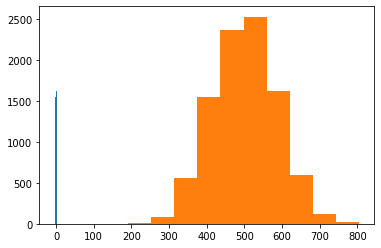

In [ ]:
plt.hist(standardized.AvgMath)
plt.hist(PISA_test["AvgMath"])

In [ ]:
PISA_final = pd.concat([PISA_test.iloc[:,0:16], standardized], axis = 1 )

In [ ]:
PISA_final

,MISCED0,MISCED1,MISCED2,MISCED3,MISCED4,MISCED5,MISCED6,FISCED0,FISCED1,FISCED2,...,PERFEED,EMOSUPS,PERCOMP,PERCOOP,FAILURE,MEANINGLIFE,RESILIENCE,COGFLEX,BELONG,AvgMath
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.718981,0.918717,1.796557,1.774915,1.630427,1.790971,2.465073,2.001949,3.090126,-0.186031
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.676222,0.918717,1.796557,1.774915,-2.152398,-0.852931,2.465073,2.001949,3.080905,-0.740406
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.234269,0.918717,0.367474,1.774915,1.148427,1.790971,2.465073,2.001949,3.057327,-1.351913
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.498872,0.918717,-2.477109,1.774915,1.148427,1.790971,2.465073,2.001949,3.057327,0.002198
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.405695,0.918717,1.796557,1.774915,0.335366,1.790971,2.465073,2.001949,3.057327,0.098446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.387081,-2.321363,-2.019497,-2.317042,1.630427,-1.982496,-2.343196,-1.380845,-3.189708,-0.143952
9455,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.718981,-1.896769,-1.017886,-2.317042,0.834658,-1.982496,-1.462014,-1.429440,-3.189708,-0.950089
9456,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.718981,0.918717,1.796557,-2.317042,0.204220,-1.982496,-1.674812,-1.498274,-3.189708,-2.057534
9457,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-2.062741,-1.390873,0.367474,-2.317042,1.630427,-1.982496,-2.700357,-3.431944,-3.189708,-2.182230


In [ ]:
PISA_final["GENDER"] = PISA_final["GENDER"]-1
PISA_final["GENDER"]

0       1
1       1
2       0
3       0
4       0
       ..
9454    0
9455    0
9456    0
9457    0
9458    1
Name: GENDER, Length: 9459, dtype: int64

# Standardization of PISA2 (NIL)

(to look at?)



In [ ]:
PISA2

,GENDER,MOTHEREDU,FATHEREDU,REPEAT,WEALTH,TEACHSUP,TeacherInstruction,PERFEED,EMOSUPS,PERCOMP,PERCOOP,FAILURE,MEANINGLIFE,RESILIENCE,COGFLEX,BELONG,AvgMath
0,2,6,6,1,3.1045,-1.1481,-1.0499,-0.3253,1.0346,2.0378,1.6762,1.8905,1.7411,2.3693,2.1449,2.7562,484.92
1,2,4,2,0,0.4783,1.3140,1.8202,2.0165,1.0346,2.0378,1.6762,-1.8939,-0.9827,2.3693,2.1449,2.7474,438.15
2,1,4,6,0,1.5937,1.3140,1.8202,1.5844,1.0346,0.6912,1.6762,1.4083,1.7411,2.3693,2.1449,2.7249,386.56
3,1,6,6,0,0.1184,0.7015,0.2860,0.8654,1.0346,-1.9892,1.6762,1.4083,1.7411,2.3693,2.1449,2.7249,500.80
4,1,6,5,0,1.9399,0.7015,-0.0424,0.7743,1.0346,2.0378,1.6762,0.5949,1.7411,2.3693,2.1449,2.7249,508.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,1,5,4,0,-0.4479,-1.6385,-1.3309,-0.0008,-2.0819,-1.5580,-2.1428,1.8905,-2.1464,-2.1837,-1.2313,-3.2367,488.47
9455,1,6,6,0,1.1025,-1.1846,1.1049,-0.3253,-1.6735,-0.6142,-2.1428,1.0944,-2.1464,-1.3493,-1.2798,-3.2367,420.46
9456,1,6,6,0,2.6742,-0.9306,0.0351,-0.3253,1.0346,2.0378,-2.1428,0.4637,-2.1464,-1.5508,-1.3485,-3.2367,327.03
9457,1,6,6,0,0.2030,1.3140,1.8202,-1.6391,-1.1869,0.6912,-2.1428,1.8905,-2.1464,-2.5219,-3.2784,-3.2367,316.51


In [ ]:
# Standardizing 

# Remove variables that do not contribute to predictors

See Recursive Feature Elimination

In [ ]:
PISA_final = PISA_final.drop(["WEALTH","PERCOMP", "BELONG"], axis = 1)

# Split into train and test splits

In [ ]:
#Select the predictors and outcome
PISA_data = PISA_final.drop(["AvgMath"], axis = 1)
PISA_score = PISA_final["AvgMath"]

In [ ]:
PISA_data.columns

Index(['MISCED0', 'MISCED1', 'MISCED2', 'MISCED3', 'MISCED4', 'MISCED5',
       'MISCED6', 'FISCED0', 'FISCED1', 'FISCED2', 'FISCED3', 'FISCED4',
       'FISCED5', 'FISCED6', 'GENDER', 'REPEAT', 'TEACHSUP',
       'TeacherInstruction', 'PERFEED', 'EMOSUPS', 'PERCOOP', 'FAILURE',
       'MEANINGLIFE', 'RESILIENCE', 'COGFLEX'],
      dtype='object')

In [ ]:
## splitting the values
PISA_X_train, PISA_X_test, PISA_y_train, PISA_y_test = train_test_split(PISA_data, PISA_score, 
                                                                        test_size = int(.2*len(PISA_data)),
                                                                        random_state = 42)

# Baseline: linear regression 

## Linear Regression without Parent education (standardized)

In [ ]:
%%time
LR = LinearRegression()
LR.fit(PISA_data.iloc[:,14:], PISA_score)

CPU times: user 8.18 ms, sys: 11.7 ms, total: 19.9 ms
Wall time: 45.5 ms


In [ ]:
LR.intercept_, LR.coef_, PISA_data.iloc[:,14:].columns

(-0.09063412814610149,
 array([ 0.22875845, -0.45548382,  0.14094318, -0.21868249,  0.03345664,
         0.12784525,  0.11076742,  0.11548532, -0.15780937,  0.07802197,
         0.13671637]),
 Index(['GENDER', 'REPEAT', 'TEACHSUP', 'TeacherInstruction', 'PERFEED',
        'EMOSUPS', 'PERCOOP', 'FAILURE', 'MEANINGLIFE', 'RESILIENCE',
        'COGFLEX'],
       dtype='object'))

In [ ]:
y_pred = LR.predict(PISA_data.iloc[:,14:])

In [ ]:
y_pred

array([ 0.3603516 ,  0.62621096,  0.34663064, ..., -0.43586661,
       -1.006969  , -1.01171785])

In [ ]:
# selected columns only
mean_squared_error(PISA_score, y_pred), r2_score(PISA_score, y_pred)

(0.8589417282649593, 0.1410582717350407)

In [ ]:
names = PISA_data.iloc[:,14:].columns
LRcoef = LR.coef_

In [ ]:
for i in range(0,len(names)):
  print("Cofficient for", f"{names[i]} is {LRcoef[i]:.2f}")

Cofficient for GENDER is 0.23
Cofficient for REPEAT is -0.46
Cofficient for TEACHSUP is 0.14
Cofficient for TeacherInstruction is -0.22
Cofficient for PERFEED is 0.03
Cofficient for EMOSUPS is 0.13
Cofficient for PERCOOP is 0.11
Cofficient for FAILURE is 0.12
Cofficient for MEANINGLIFE is -0.16
Cofficient for RESILIENCE is 0.08
Cofficient for COGFLEX is 0.14


## Linear Regression with all variables (standardized)

In [ ]:
%%time
LR1 = LinearRegression()
LR1.fit(PISA_X_train, PISA_y_train)

CPU times: user 19 ms, sys: 9.67 ms, total: 28.7 ms
Wall time: 23.7 ms


In [ ]:
LR1.intercept_, LR1.coef_, PISA_data.columns

(-16736806677703.42,
 array([ 8.59155221e+12,  8.59155221e+12,  8.59155221e+12,  8.59155221e+12,
         8.59155221e+12,  8.59155221e+12,  8.59155221e+12,  8.14525447e+12,
         8.14525447e+12,  8.14525447e+12,  8.14525447e+12,  8.14525447e+12,
         8.14525447e+12,  8.14525447e+12,  2.07362767e-01, -4.92176586e-01,
         1.42312298e-01, -1.99218750e-01,  2.24609375e-02,  1.03515625e-01,
         1.02264404e-01,  1.00097656e-01, -1.49658203e-01,  5.93261719e-02,
         1.11724854e-01]),
 Index(['MISCED0', 'MISCED1', 'MISCED2', 'MISCED3', 'MISCED4', 'MISCED5',
        'MISCED6', 'FISCED0', 'FISCED1', 'FISCED2', 'FISCED3', 'FISCED4',
        'FISCED5', 'FISCED6', 'GENDER', 'REPEAT', 'TEACHSUP',
        'TeacherInstruction', 'PERFEED', 'EMOSUPS', 'PERCOOP', 'FAILURE',
        'MEANINGLIFE', 'RESILIENCE', 'COGFLEX'],
       dtype='object'))

In [ ]:
y_pred_all = LR1.predict(PISA_X_test)

In [ ]:
mean_squared_error(PISA_y_test, y_pred_all), r2_score(PISA_y_test, y_pred_all)

(0.8068657706653697, 0.2058104461930088)

In [ ]:
for i in range(0,len(PISA_data.columns)):
  print("Cofficient for", f"{PISA_data.columns[i]} is {LR1.coef_[i]:.2f}")

Cofficient for MISCED0 is 8591552208987.56
Cofficient for MISCED1 is 8591552208987.60
Cofficient for MISCED2 is 8591552208987.68
Cofficient for MISCED3 is 8591552208987.60
Cofficient for MISCED4 is 8591552208987.74
Cofficient for MISCED5 is 8591552208987.79
Cofficient for MISCED6 is 8591552208987.93
Cofficient for FISCED0 is 8145254468715.14
Cofficient for FISCED1 is 8145254468715.32
Cofficient for FISCED2 is 8145254468715.26
Cofficient for FISCED3 is 8145254468715.20
Cofficient for FISCED4 is 8145254468715.42
Cofficient for FISCED5 is 8145254468715.35
Cofficient for FISCED6 is 8145254468715.78
Cofficient for GENDER is 0.21
Cofficient for REPEAT is -0.49
Cofficient for TEACHSUP is 0.14
Cofficient for TeacherInstruction is -0.20
Cofficient for PERFEED is 0.02
Cofficient for EMOSUPS is 0.10
Cofficient for PERCOOP is 0.10
Cofficient for FAILURE is 0.10
Cofficient for MEANINGLIFE is -0.15
Cofficient for RESILIENCE is 0.06
Cofficient for COGFLEX is 0.11


## note: Baseline regression on test set MSE is 0.807 

# SGDRegressor
Stoichastic gradient regression

In [ ]:
PISA_score # standardized

0      -0.186031
1      -0.740406
2      -1.351913
3       0.002198
4       0.098446
          ...   
9454   -0.143952
9455   -0.950089
9456   -2.057534
9457   -2.182230
9458   -0.971899
Name: AvgMath, Length: 9459, dtype: float64

In [ ]:
%%time
sgd_reg = SGDRegressor(random_state = 42,
                       max_iter = 1000, #epochs
                       tol = 1e-3, #stopping criterion
                       eta0 = 0.1) #learning rate
sgd_reg.fit(PISA_X_train, PISA_y_train)
sgd_reg.intercept_, sgd_reg.coef_

CPU times: user 58.8 ms, sys: 10.7 ms, total: 69.5 ms
Wall time: 76.8 ms


In [ ]:
y_pred_sgd = sgd_reg.predict(PISA_X_test)
r2_score(PISA_y_test, y_pred_sgd), mean_squared_error(PISA_y_test, y_pred_sgd)

(0.16636008031567673, 0.8469458116506231)

### Performance on SGDRegressor at iteration 1 is worse (MSE at 0.847)

## SGDRegressor iteration 2: fine tuning

see page 76; using GridSearchCV

In [ ]:
param_grid_SGD = [
               {'penalty':['l2','l1','elasticnet'], 
                'alpha':[0.0001,0.0002,0.0005],
                'max_iter':[1000,2000,3000]}
]

In [ ]:
sgd_reg = SGDRegressor()
grid_search_SGD = GridSearchCV(sgd_reg, param_grid_SGD,
                               scoring = "neg_root_mean_squared_error",
                               cv = 3 #cross validation
                               )

In [ ]:
%%time
grid_search_SGD.fit(PISA_X_train, PISA_y_train)

CPU times: user 2.44 s, sys: 1.6 s, total: 4.04 s
Wall time: 3.86 s


GridSearchCV(cv=3, estimator=SGDRegressor(),
             param_grid=[{'alpha': [0.0001, 0.0002, 0.0005],
                          'max_iter': [1000, 2000, 3000],
                          'penalty': ['l2', 'l1', 'elasticnet']}],
             scoring='neg_root_mean_squared_error')

In [ ]:
grid_search_SGD.best_params_

{'alpha': 0.0005, 'max_iter': 2000, 'penalty': 'l2'}

In [ ]:
grid_search_SGD.best_estimator_

SGDRegressor(alpha=0.0005, max_iter=2000)

In [ ]:
%%time
sgd_reg1 = SGDRegressor(random_state = 42,
                        max_iter = 1000,
                        penalty = 'elasticnet',
                        alpha = 0.0001,
                        tol = 1e-3,
                        eta0 = 0.01)

sgd_reg1.fit(PISA_X_train, PISA_y_train)

CPU times: user 38.9 ms, sys: 20.8 ms, total: 59.7 ms
Wall time: 87.8 ms


In [ ]:
y_pred_SGD1 = sgd_reg1.predict(PISA_X_test)
mean_squared_error(y_true = PISA_y_test,
                   y_pred = y_pred_SGD1)

0.8070842091782899

## Performance on SGDRegressor at iteration 2 is close to regression (MSE at 0.807).

## Follow up for SGD
* feature importances
* more iterations and fine tuning?


# ADABoost Regressor

For ADABoost classifier: 
What this algorithm does is that it builds a model and gives equal weights to all the data points. It then assigns higher weights to points that are wrongly classified. Now all the points which have higher weights are given more importance in the next model. It will keep training models until and unless a lower error is received.

source: https://www.analyticsvidhya.com/blog/202109/adaboost-algorithm-a-complete-guide-for-beginners/

See: https://machinelearningmastery.com/adaboost-ensemble-in-python/ for incorporating Cross validation

## ADABoost Regressor iteration 1

In [ ]:
%%time
ada_reg = AdaBoostRegressor(random_state = 42, 
                            n_estimators = 100)
ada_reg.fit(PISA_X_train, PISA_y_train)



CPU times: user 520 ms, sys: 29.4 ms, total: 549 ms
Wall time: 682 ms


In [ ]:
y_pred_ada = ada_reg.predict(PISA_X_test)
mean_squared_error(PISA_y_test, y_pred_ada)

0.8574005099361335

### ADABoost Regressor iteration 1 MSE: 0.857

## ADABoost Regressor iteration 2 and fine tuning

In [ ]:
param_grid_ADA = [
               {'n_estimators':[50,100,200],
                'learning_rate':[1,1.5,2],
                'loss':['linear','square','exponential']}
]

In [ ]:
ADA_reg = AdaBoostRegressor()
grid_search_ADA = GridSearchCV(ADA_reg, param_grid_ADA,
                               scoring = "neg_root_mean_squared_error",
                               cv = 3 #cross validation
                               )

In [ ]:
%%time
grid_search_ADA.fit(PISA_X_train, PISA_y_train)

CPU times: user 55 s, sys: 559 ms, total: 55.6 s
Wall time: 55.5 s


GridSearchCV(cv=3, estimator=AdaBoostRegressor(),
             param_grid=[{'learning_rate': [1, 1.5, 2],
                          'loss': ['linear', 'square', 'exponential'],
                          'n_estimators': [50, 100, 200]}],
             scoring='neg_root_mean_squared_error')

In [ ]:
grid_search_ADA.best_estimator_

AdaBoostRegressor(learning_rate=1.5, n_estimators=200)

In [ ]:
grid_search_ADA.best_params_

{'learning_rate': 1.5, 'loss': 'linear', 'n_estimators': 200}

In [ ]:
%%time
ada_reg2 = AdaBoostRegressor(random_state = 42, 
                            n_estimators = 200,
                            loss = 'linear')
ada_reg2.fit(PISA_X_train, PISA_y_train)


CPU times: user 358 ms, sys: 6.82 ms, total: 364 ms
Wall time: 366 ms


In [ ]:
y_pred_ADA2 = ada_reg2.predict(PISA_X_test)
mean_squared_error(PISA_y_test, y_pred_ADA2)

0.8574005099361335

### ADABoost Regressor iteration 2 MSE: 0.857

# Support Vector Regressor

## SVR Iteration 1

In [ ]:
%%time
svr = SVR()
svr.fit(PISA_X_train, PISA_y_train)

CPU times: user 3.73 s, sys: 143 ms, total: 3.87 s
Wall time: 3.87 s


In [ ]:
y_pred_svr1 = svr.predict(PISA_X_test)
mean_squared_error(PISA_y_test, y_pred_svr1)

0.8132053735942832

### SVR Iteration 1 MSE: 0.813

## SVR iteration 2 with fine tuning

parameters 

epsilon: Epsilon in SVR is a very easy parameter to understand. It denotes how much error you are willing to allow per training data instance.
source: https://www.quora.com/What-is-an-appropriate-grid-search-range-for-optimizing-the-parameter-epsilon-in-epsilon-support-vector-regression


see: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR

In [ ]:
param_grid_SVR = [
                  {"kernel":['linear', 'poly', 'rbf'], 
                   'gamma': ['scale','auto'],
                   'epsilon':[0, 0.01, 0.1, 0.5, 1, 2]}]

In [ ]:
svr = SVR()
grid_search_svr = GridSearchCV(estimator = svr,
                               param_grid = param_grid_SVR, 
                               scoring = "neg_root_mean_squared_error",
                               cv = 3,
                               )

In [ ]:
%%script false
%%time
grid_search_svr.fit(PISA_X_train, PISA_y_train)

In [ ]:
%%script false
grid_search_svr.best_params_

# {'epsilon': 1, 'gamma': 'auto', 'kernel': 'rbf'}

In [ ]:
%%script false
grid_search_svr.best_estimator_

# SVR(epsilon=1, gamma='auto')

In [ ]:
%%time
svr2 = SVR(kernel = "rbf",
           epsilon = 1,
           gamma = "auto")

svr2.fit(PISA_X_train, PISA_y_train)

CPU times: user 974 ms, sys: 24.9 ms, total: 999 ms
Wall time: 997 ms


In [ ]:
y_pred_svr2 = svr2.predict(PISA_X_test)
mean_squared_error(PISA_y_test, y_pred_svr2)

0.7880748618759017

### SVR Iteration 2 MSE: 0.788 (beats baseline)

# TensorFlow and Neural Nets

In [ ]:
type(PISA_X_train)

pandas.core.frame.DataFrame

## Preprocessing of data into tensors

In [ ]:
X_train = tf.convert_to_tensor(PISA_X_train)
X_test = tf.convert_to_tensor(PISA_X_test)

y_train = tf.convert_to_tensor(PISA_y_train)
y_test = tf.convert_to_tensor(PISA_y_test)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(TensorShape([7568, 25]),
 TensorShape([1891, 25]),
 TensorShape([7568]),
 TensorShape([1891]))

note. should the tensors for y should be [##,] instead of [##]?

# Feauture selection added on 8th July

lassonet takes in numpy.arrays

In [ ]:
X_train.numpy()

array([[ 0.        ,  0.        ,  0.        , ..., -0.85293107,
        -0.91074772, -0.6855897 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.35535477,
         1.22324494,  0.60913428],
       [ 0.        ,  0.        ,  0.        , ...,  0.35535477,
        -0.10190673,  0.87775794],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.35535477,
        -1.15469898,  1.18425544],
       [ 0.        ,  0.        ,  0.        , ..., -0.20200202,
         0.370366  ,  2.00194948],
       [ 0.        ,  0.        ,  0.        , ...,  1.79097073,
        -0.10190673,  0.06978285]])

In [ ]:
model = LassoNetRegressor()
path = model.fit(X_train.numpy(), y_train.numpy())
# print("Best model scored", model.score(X_test.numpy(), y_test.numpy()))
# print("Lambda =", model.best_lambda_)

In [ ]:
# test  =

# Neural Nets

In [ ]:
stopper function = 

SyntaxError: ignored

## NN model 1 (dirty)

In [ ]:
model_1 = Sequential([
                      Layers.Dense(50, activation = 'relu', kernel_initializer = 'glorot_uniform'),
                      Layers.Dense(1, activation = 'linear')
]) 

model_1.compile(loss = "MSE",
                optimizer = Adam(),
                metrics = "MSE")

In [ ]:
%%time 
tf.random.set_seed = 42 

history_1 = model_1.fit(X_train, y_train, 
            validation_data = (X_test, y_test),
            epochs = 10,
            verbose = 1)

In [ ]:
plt.plot(history_1.history['loss'], label='MSE (training data)')
plt.plot(history_1.history['val_loss'], label='MSE (validation data)')
plt.legend();

### Dirty Neural net 1 MSE: 0.787

## Global hyperparams

In [ ]:
ACTIVATION = 'selu' #relu LeakyReLU selu elu gelu
LAYERS = 32
OPTIMIZER = tf.keras.optimizers.Adamax(learning_rate = 0.0005) #choices, Nadam(), Adam()
BATCH_SIZE = 8
KERNEL = 'he_normal' #choices: he_normal, glorot_normal, LecunNormal
EPOCH = 10

## NN Model 2

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("NN_model_2.h5", save_best_only = True)


model_2 = Sequential([
                      Layers.Dense(LAYERS, activation = ACTIVATION, kernel_initializer = KERNEL, name = "HiddenLayer1"),
                      Layers.Dense(LAYERS, activation = ACTIVATION, kernel_initializer = KERNEL, name = "HiddenLayer2"),
                      Layers.Dense(1, activation = 'linear', name = "OutputLayer")
])

model_2.compile (loss = "MSE",
                 optimizer = OPTIMIZER,
                 metrics = "MSE")

In [ ]:
%%time
tf.random.set_seed = 42
history_2 = model_2.fit(PISA_X_train,
                        PISA_y_train,
                        epochs = EPOCH,
                        validation_data = (PISA_X_test,PISA_y_test),
                        batch_size = BATCH_SIZE,
                        verbose = 1,
                        callbacks = checkpoint)

In [ ]:
plot_model(model_2)

In [ ]:
model_2 = tf.keras.models.load_model("NN_model_2.h5")
model_2.evaluate(PISA_X_test,PISA_y_test)

In [ ]:
plt.plot(history_2.history["loss"])
plt.plot(history_2.history["val_loss"])
#plt.plot(history_1.history["loss"])
#plt.plot(history_1.history["val_loss"])
plt.figure(figsize = [20,14]);

### For the following HYPERPARAMS, the MSE on validation was 0.785

ACTIVATION = 'gelu' 

LAYERS = 32

OPTIMIZER = tf.keras.optimizers.Adamax() 

BATCH_SIZE = 32

KERNEL = 'glorot_normal' 

EPOCH = 50

### MSE on validation was 0.777

* ACTIVATION = 'elu' 
* LAYERS = 32
* OPTIMIZER = tf.keras.optimizers.Adamax(learning_rate = 0.0005) 
* BATCH_SIZE = 16
* KERNEL = 'glorot_normal' 
* EPOCH = 50





### MSE 0.775

* ACTIVATION = 'elu' 
* LAYERS = 16
* OPTIMIZER = tf.keras.optimizers.Adamax(learning_rate = 0.0005) 
* BATCH_SIZE = 8
* KERNEL = 'glorot_normal' 
* `EPOCH` = 50

## NN model 3
Removing the categorical variables?

In [ ]:
PISA_data

In [ ]:
X = PISA_data.iloc[:,16:]
y = PISA_final["AvgMath"]

In [ ]:
y

In [ ]:
PISA_X_train2, PISA_X_test2, PISA_y_train2, PISA_y_test2 = train_test_split(X, 
                                                                            y, 
                                                                            test_size = int(.2*len(X)),
                                                                            random_state = 42)

In [ ]:
PISA_X_train2.shape, PISA_X_test2.shape, PISA_y_train2.shape, PISA_y_test2.shape

In [ ]:
PISA_X_train2

In [ ]:
ACTIVATION = 'gelu' #relu LeakyReLU selu elu gelu
LAYERS = 32
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate = 0.001) #choices, Nadam(), Adam()
BATCH_SIZE = 8
KERNEL = 'glorot_normal' #choices: he_normal, glorot_normal, LecunNormal
EPOCH = 10

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("NN_model_3.h5", save_best_only = True)


model_3 = Sequential([
                      Layers.Dense(LAYERS, activation = ACTIVATION, kernel_initializer = KERNEL),
                      Layers.Dense(LAYERS, activation = ACTIVATION, kernel_initializer = KERNEL),
                      Layers.Dense(16, activation = ACTIVATION, kernel_initializer = KERNEL),
                      Layers.Dense(1, activation = 'linear')
])

model_3.compile (loss = "MSE",
                 optimizer = OPTIMIZER,
                 metrics = "MSE")

In [ ]:
%%time
tf.random.set_seed = 42
history_3 = model_3.fit(PISA_X_train2,
                        PISA_y_train2,
                        epochs = EPOCH,
                        validation_data = (PISA_X_test2,PISA_y_test2),
                        batch_size = BATCH_SIZE,
                        verbose = 1,
                        callbacks = checkpoint)

In [ ]:
model_3 = tf.keras.models.load_model("NN_model_3.h5")
model_3.evaluate(PISA_X_test2,PISA_y_test2)

In [ ]:
plt.plot(history_3.history["loss"])
plt.plot(history_3.history["val_loss"])
#plt.plot(history_1.history["loss"])
#plt.plot(history_1.history["val_loss"])
plt.figure(figsize = [20,14]);

## Other tests

In [ ]:
tf.expand_dims(PISA_X_train.shape, axis = 1)

In [ ]:
%%script false
model_3 = Sequential([
                      Layers.SimpleRNN(32, activation = 'relu'),
                      Layers.Dense(1)
])

model_3.compile(loss= "MSE",
                optimizer = Adam())

In [ ]:
%%script false
model_3.fit(PISA_X_train,
            PISA_y_train,
            epochs = 5)

# Summary of models

For Math scores of:
* Mean of 500
* Range of 191.12 to 804.19
* Std of 84

In [ ]:
plt.hist(PISA_score)
plt.title("Standardized PISA Math Scores")
fig = plt.show();


## Regression: 75.46

## SGD Regressor: 75.46

## SVR: 74.56

## NN Best: 74

# things to consider next


* removing dummy features with low variance
* Recursive Feature Elimination `sklearn.feature_selection RFE`
 * *Non NN only*



see https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

also see: https://www.youtube.com/watch?v=fnupA1nWrHM&t=905s

